# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma^2
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np
import random
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# Set seed for reproducibility
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

2024-06-15 21:58:10.940787: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-15 21:58:11.292475: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 21:58:11.292601: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 21:58:11.369398: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-15 21:58:11.514277: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-15 21:58:11.515415: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
# generate training inputs

x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort() # for a better plot
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

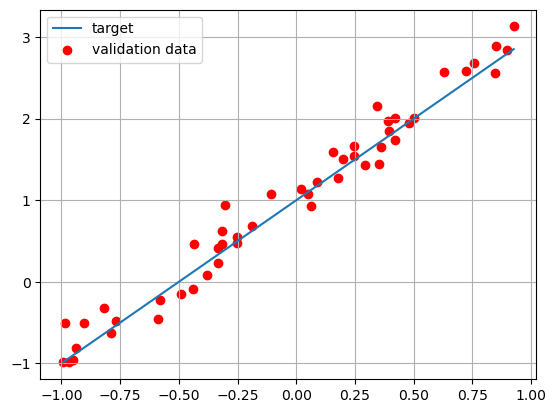

In [4]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [5]:

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [6]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [7]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 0s 9ms/step - loss: 1.9383 - mse: 1.9383 - val_loss: 1.5215 - val_mse: 1.5215
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 1.3755 - mse: 1.3755 - val_loss: 1.1010 - val_mse: 1.1010
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 1.0104 - mse: 1.0104 - val_loss: 0.8239 - val_mse: 0.8239
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 0.7662 - mse: 0.7662 - val_loss: 0.6349 - val_mse: 0.6349
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5967 - mse: 0.5967 - val_loss: 0.4993 - val_mse: 0.4993
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4725 - mse: 0.4725 - val_loss: 0.3972 - val_mse: 0.3972
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.3792 - mse: 0.3792 - val_loss: 0.3212 - val_mse: 0.3212
Epoch 8/30
16/16 [==============================] - 0s 3ms/step - loss: 0.3085 - mse: 0.30

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [8]:
# return weights and biases
model.get_weights()

[array([[1.9474198]], dtype=float32), array([0.97822785], dtype=float32)]

In [9]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0452 - mse: 0.0452

Test loss: 0.045184504240751266
Test accuracy: 0.045184504240751266


In [10]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012    

Test loss: 0.0012360847322270274
Test accuracy: 0.0012360847322270274


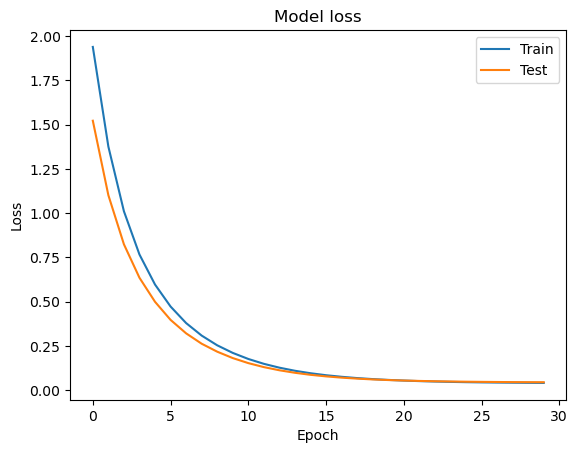

In [11]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 3ms/step


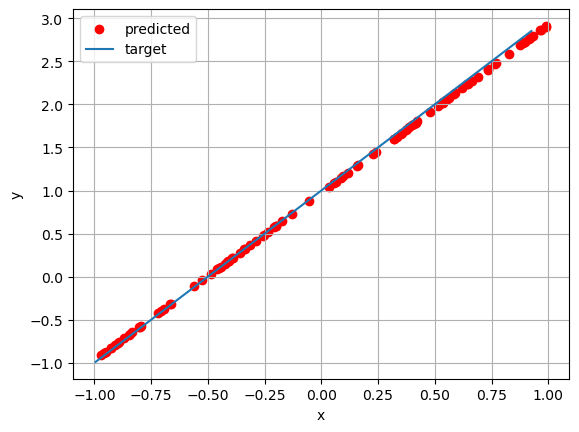

In [46]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='predicted')
plt.plot(x_valid, y_target, label='target')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

#### Dependence on $N_{epochs}$
Fixing $N_{trains}=500$, $\sigma = 0.1$ and $N_{batches}=32$, so in each epoch it calculates $\lfloor 500/32\rfloor = 15 $ gradients. $N_{valid}= 10\% N_{trains}$

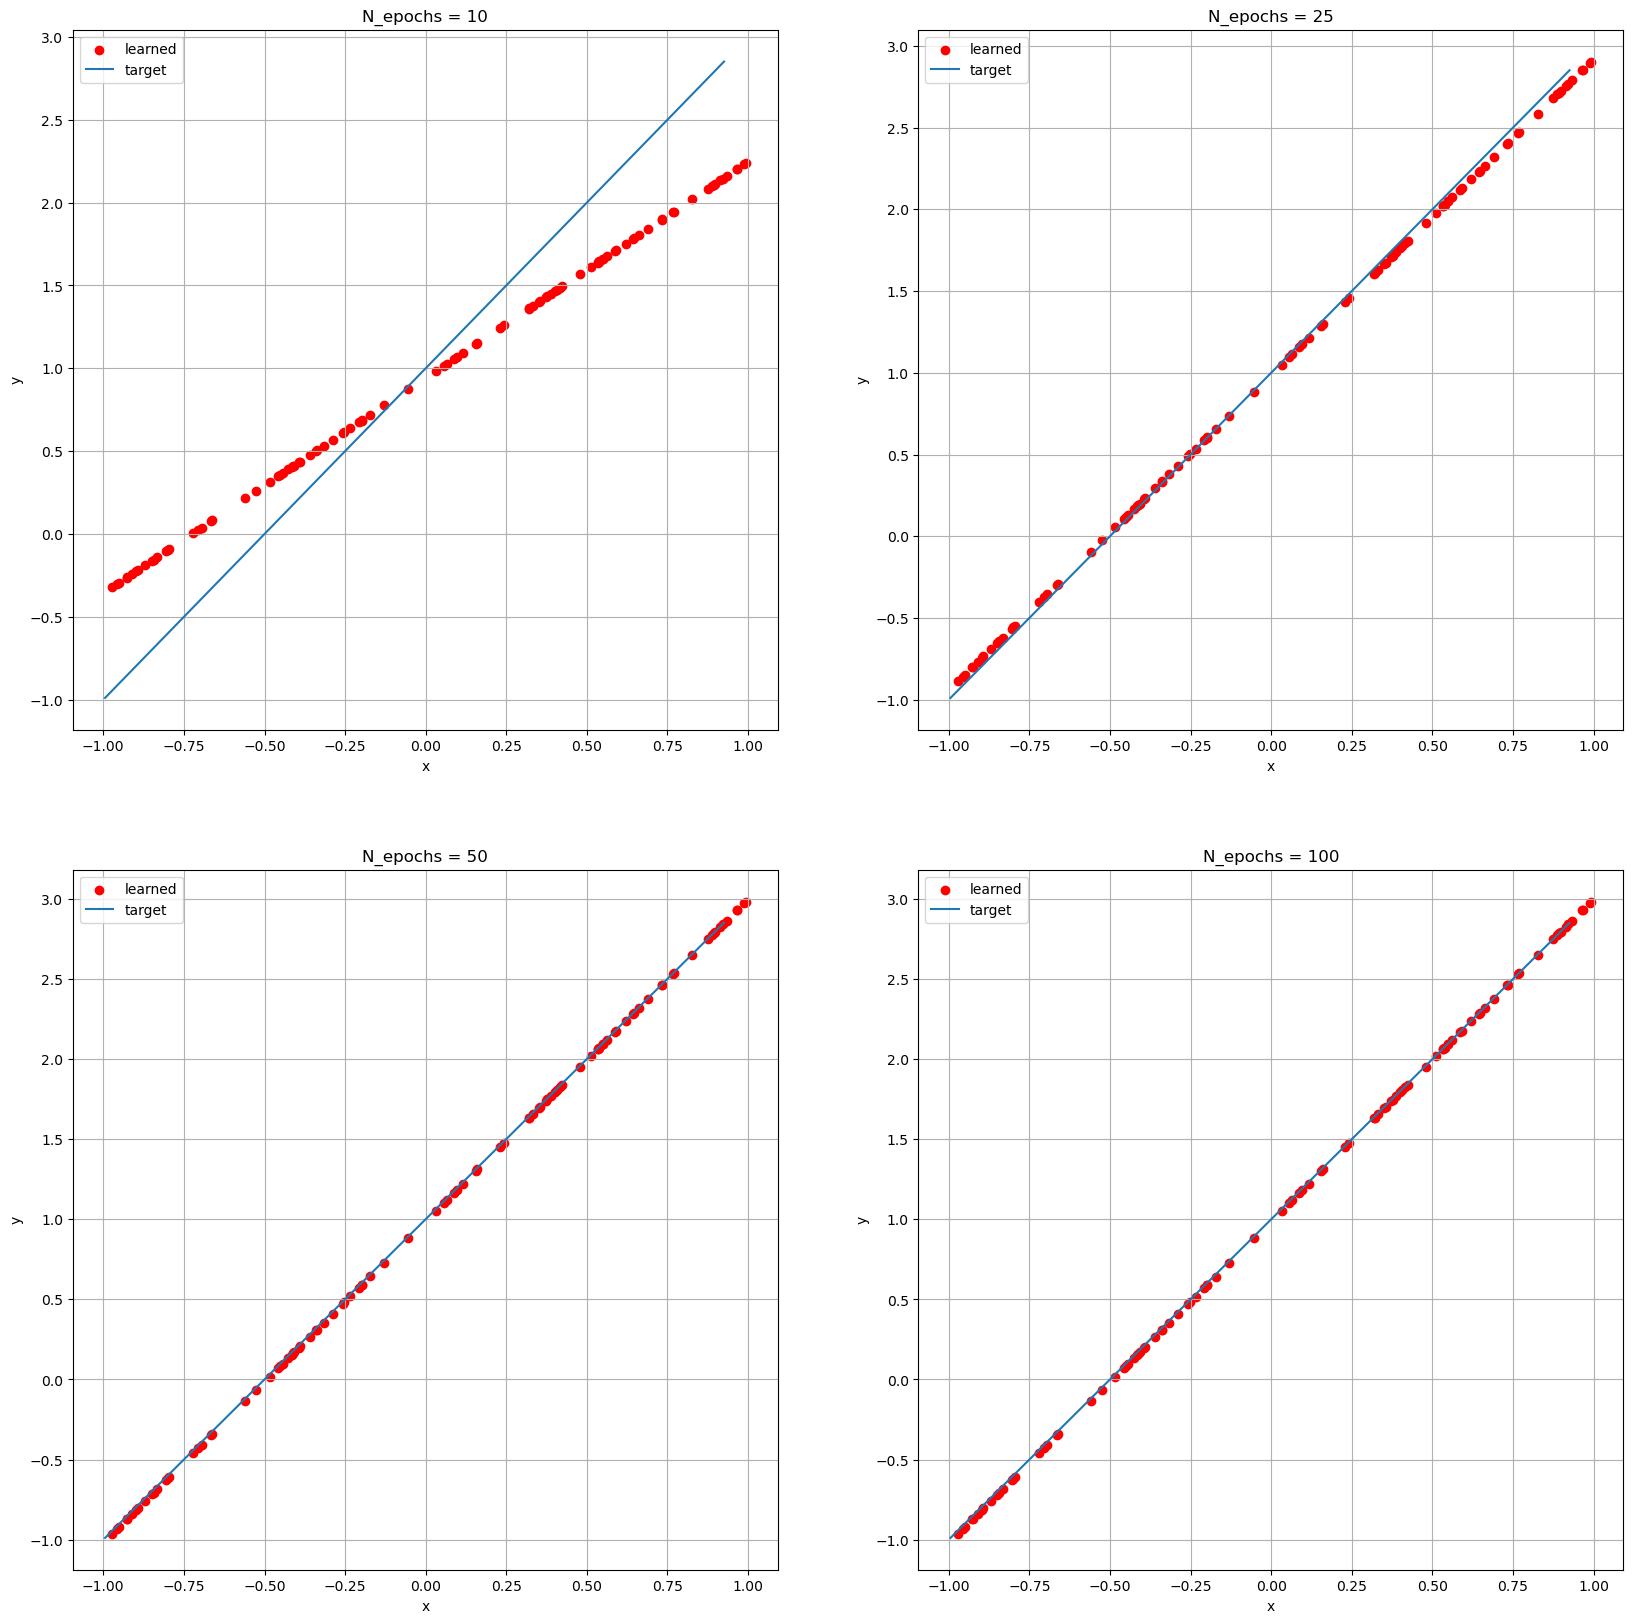

In [12]:
# Plot results generated by linear.ipynb from DATA/linear/N_epochs
# read data from file and plot results
# divide the output plot in 4 subplots, one for each number of epochs
N_epochs = [10,25,50,100]

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# plot validation and target dataset
for i,N in enumerate(N_epochs):
    x_predicted, y_predicted = np.loadtxt(f'DATA/linear/N_epochs/N_epochs_{N}.dat', delimiter=' ', unpack=True)
    axs[int(i/2)][i%2].scatter(x_predicted, y_predicted,color='r', label='learned')
    axs[int(i/2)][i%2].plot(x_valid, y_target, label='target')
    axs[int(i/2)][i%2].set_xlabel('x')
    axs[int(i/2)][i%2].set_ylabel('y')
    axs[int(i/2)][i%2].legend()
    axs[int(i/2)][i%2].grid(True)
    axs[int(i/2)][i%2].set_title(f'N_epochs = {N}')

plt.show()

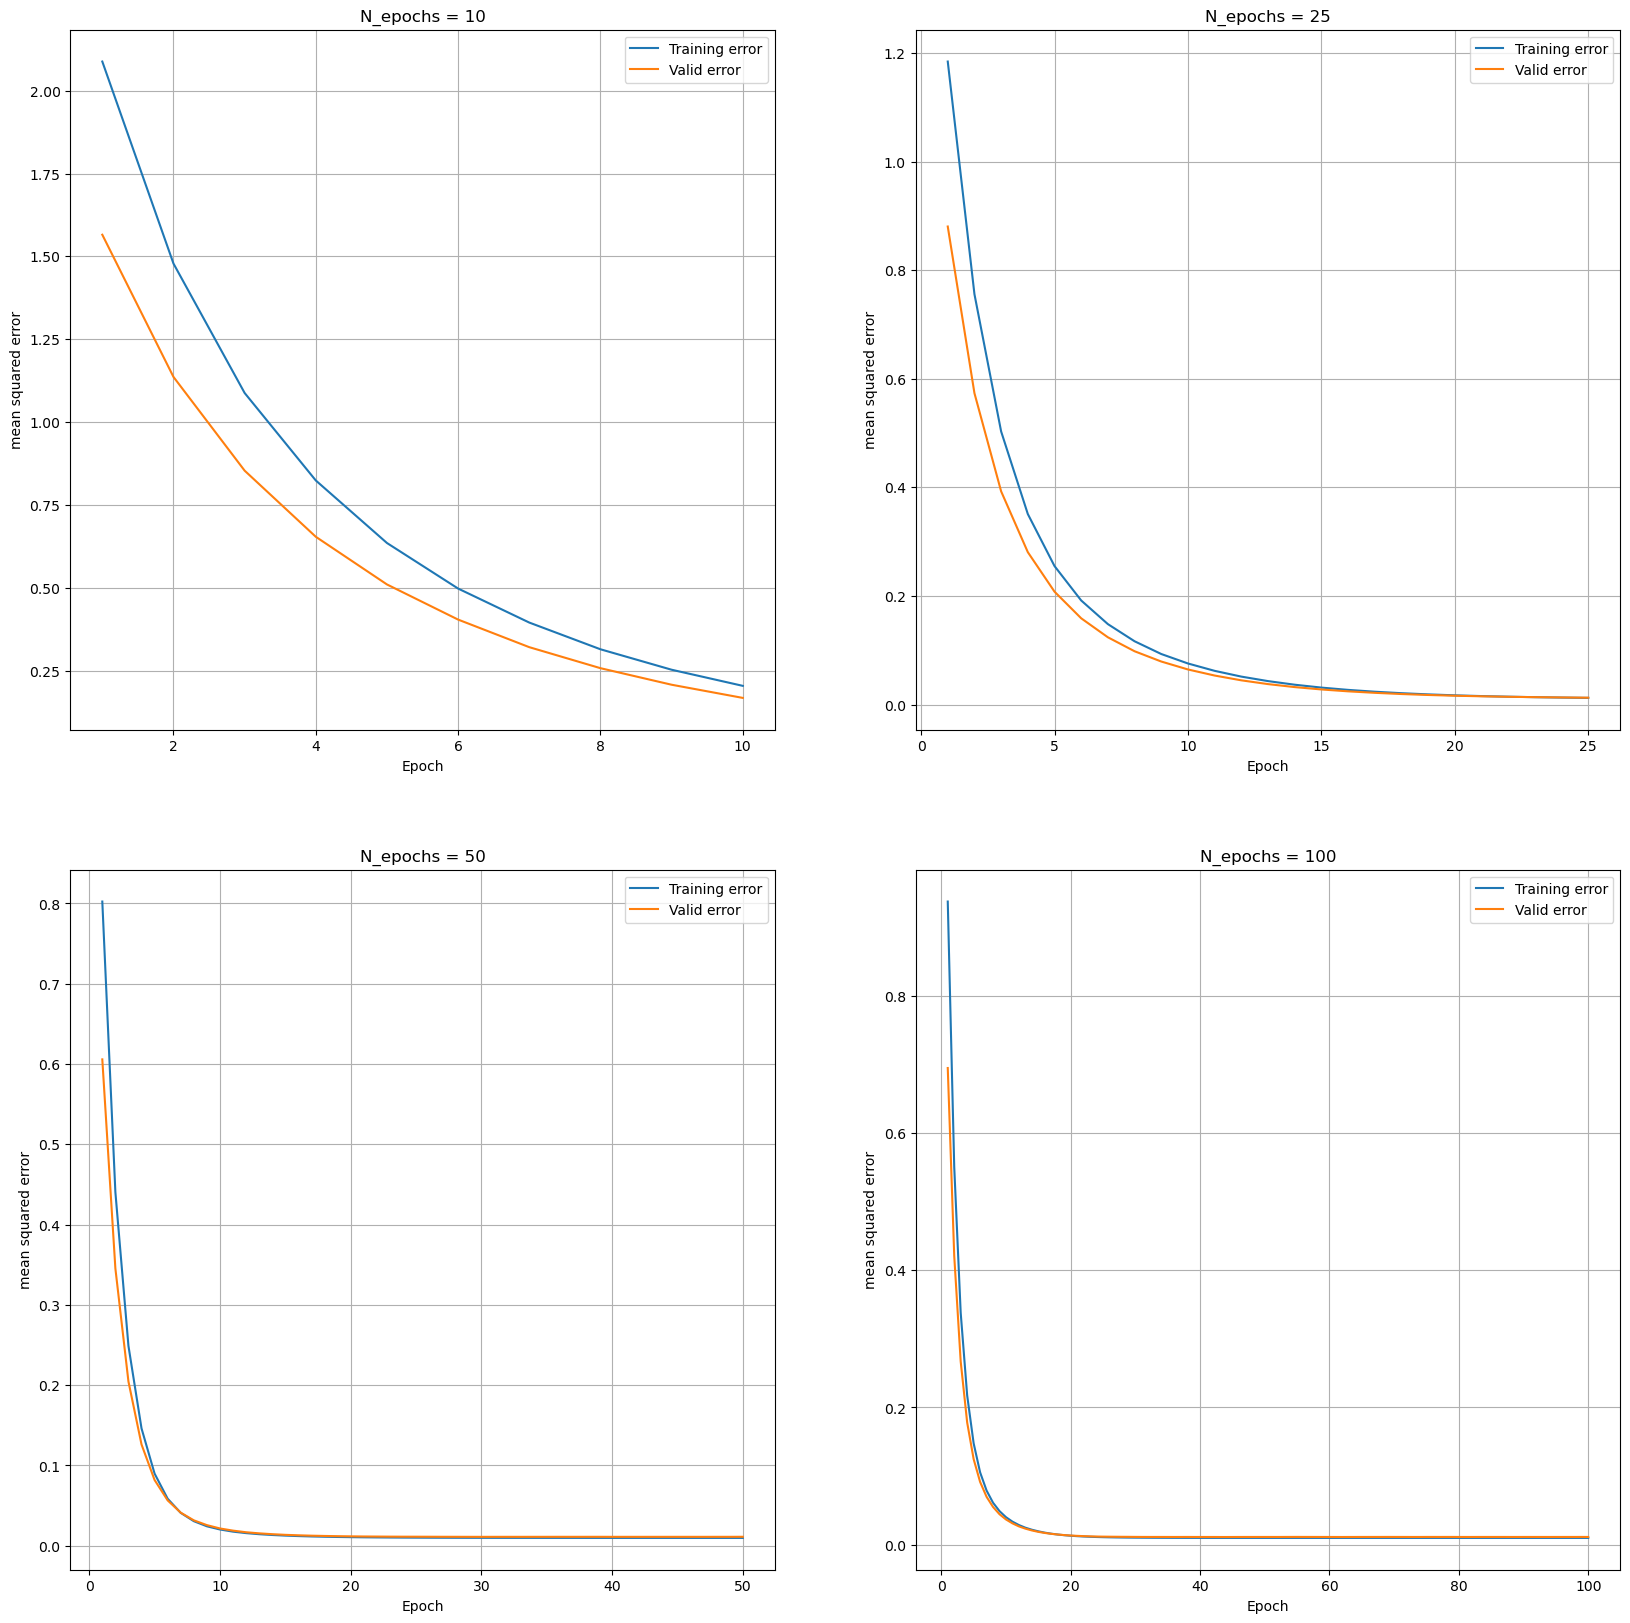

In [13]:
#plot E_train and E_valid for each number of epochs
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

for i,N in enumerate(N_epochs):
    x,E_train, E_valid = np.loadtxt(f'DATA/linear/N_epochs/loss{N}.dat',usecols=(0,1,2),delimiter=' ', unpack=True)
    axs[int(i/2)][i%2].plot(x,E_train, label='Training error')
    axs[int(i/2)][i%2].plot(x,E_valid, label='Valid error')
    axs[int(i/2)][i%2].set_xlabel('Epoch')
    axs[int(i/2)][i%2].set_ylabel('mean squared error')
    axs[int(i/2)][i%2].legend()
    axs[int(i/2)][i%2].grid(True)
    axs[int(i/2)][i%2].set_title(f'N_epochs = {N}')

plt.show()

#### Dependence on the noise $\sigma$

Fixing $N_{epochs} = 25$, $N_{batches} = 32$ and $N_{trains} = 500$

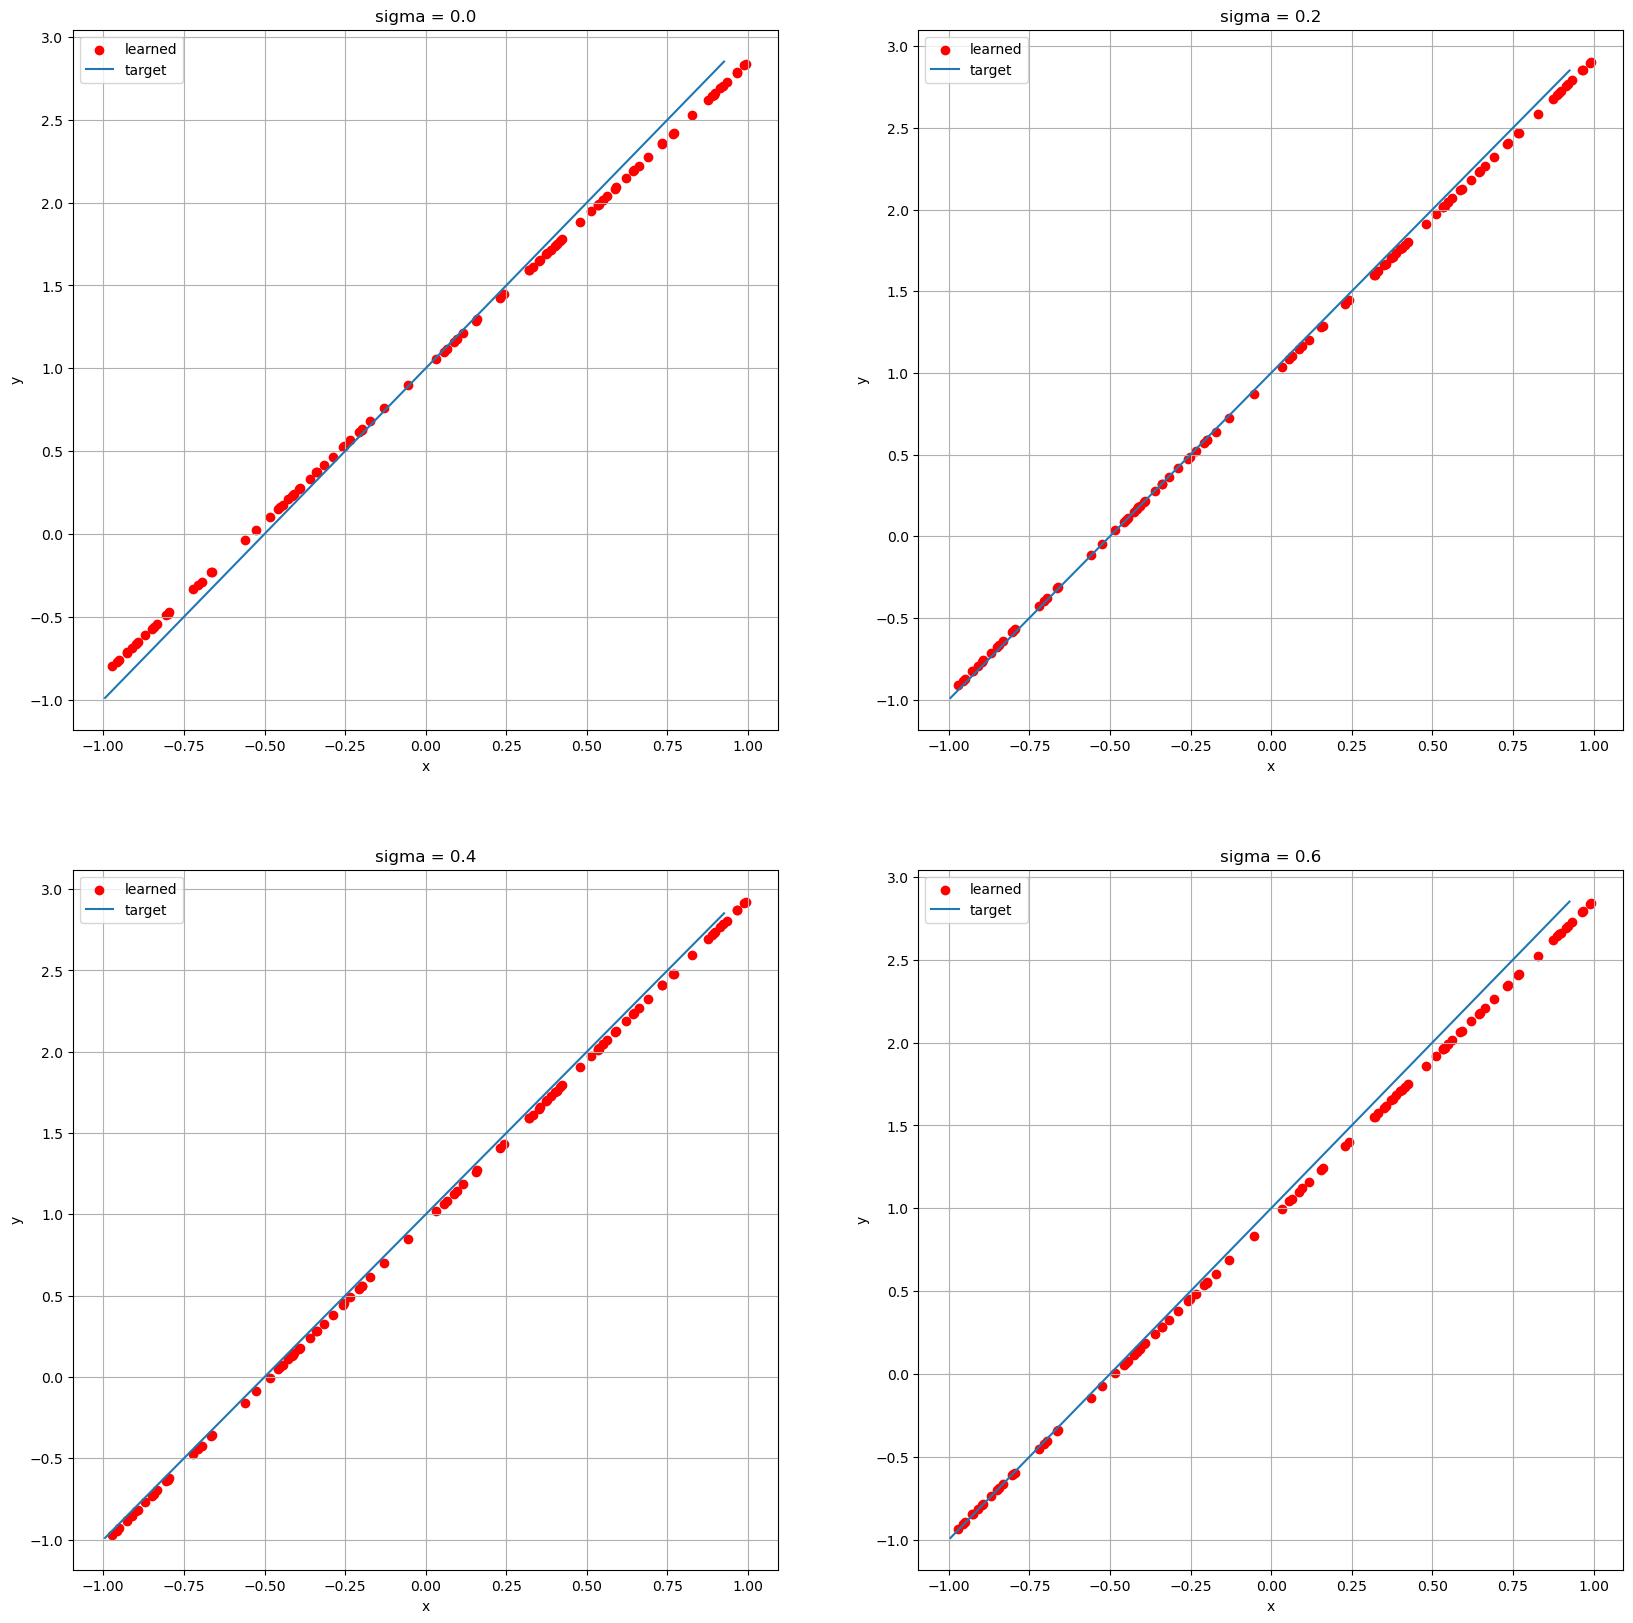

In [14]:
sigma = [0.0,0.2,0.4,0.6]

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

for i,s in enumerate(sigma):
    x_predicted, y_predicted = np.loadtxt(f'DATA/linear/sigma/sigma_{s}.dat', delimiter=' ', unpack=True)
    axs[int(i/2)][i%2].scatter(x_predicted, y_predicted,color='r', label='learned')
    axs[int(i/2)][i%2].plot(x_valid, y_target, label='target')
    axs[int(i/2)][i%2].set_xlabel('x')
    axs[int(i/2)][i%2].set_ylabel('y')
    axs[int(i/2)][i%2].legend()
    axs[int(i/2)][i%2].grid(True)
    axs[int(i/2)][i%2].set_title(f'sigma = {s}')

plt.show()

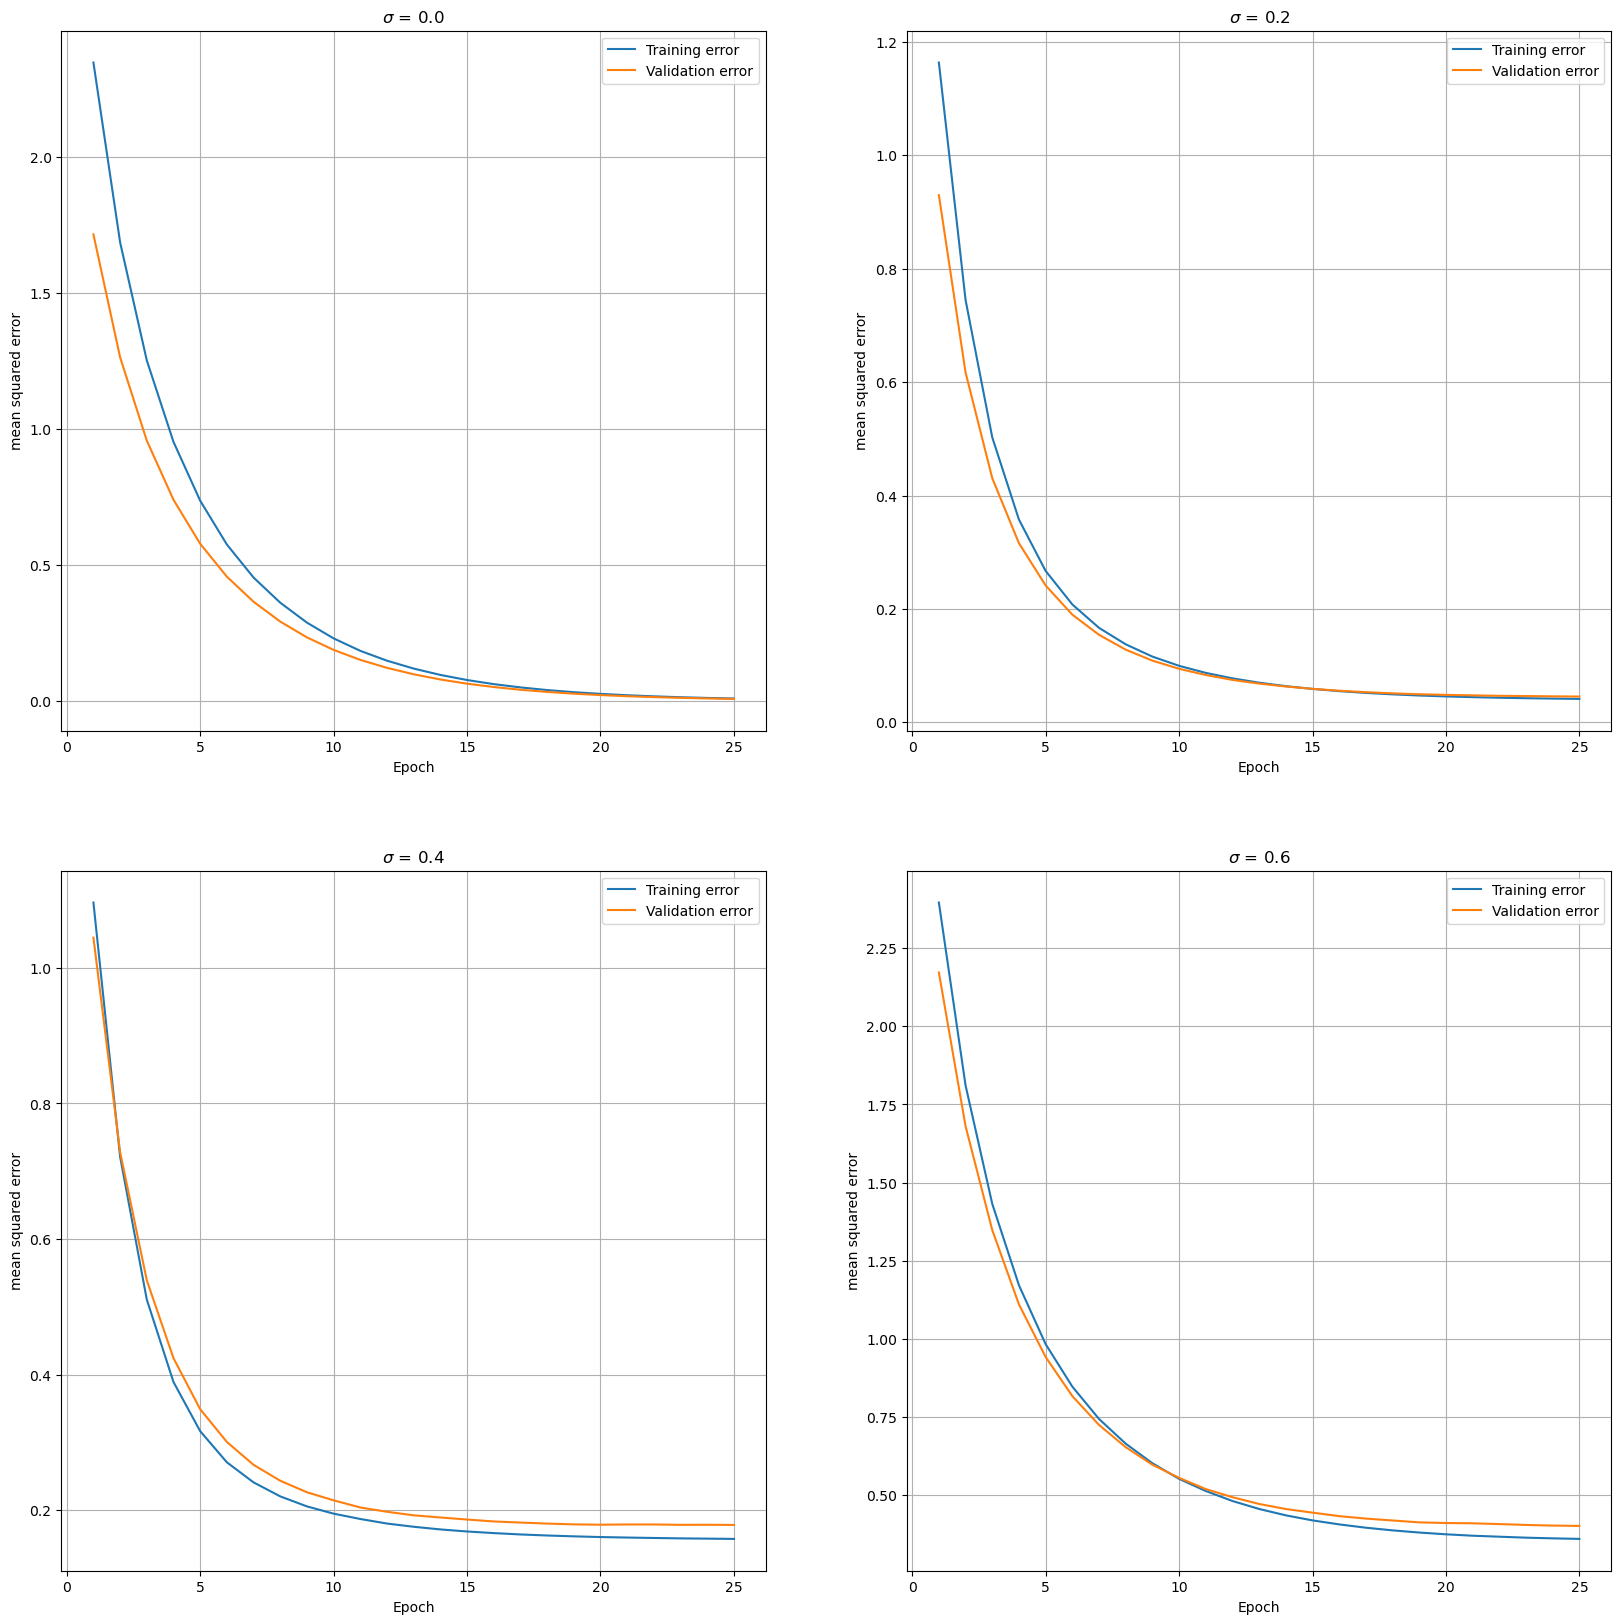

In [15]:

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

for i,s in enumerate(sigma):
    x,E_train, E_valid = np.loadtxt(f'DATA/linear/sigma/loss{s}.dat',usecols=(0,1,2),delimiter=' ', unpack=True)
    axs[int(i/2)][i%2].plot(x,E_train, label='Training error')
    axs[int(i/2)][i%2].plot(x,E_valid, label='Validation error')
    axs[int(i/2)][i%2].set_xlabel('Epoch')
    axs[int(i/2)][i%2].set_ylabel('mean squared error')
    axs[int(i/2)][i%2].legend()
    axs[int(i/2)][i%2].grid(True)
    axs[int(i/2)][i%2].set_title(r'$\sigma$ = '+str(s))

plt.show()

Observe that for noisy data, the NN learns the noise present in the data, that's the reason why $E_{train}< E_{valid}$ for later epochs.

#### Dependence of $N_{train}$
Fixing $N_{epochs} = 25$, $\sigma =0.1$ and $N_{batches} = \lfloor N_{train}/16 \rfloor$.

If i were to fix the number of batches to be $N_{batch}=32$ , the NN will do more and more gradient descent steps per generations, and it would be unfair.

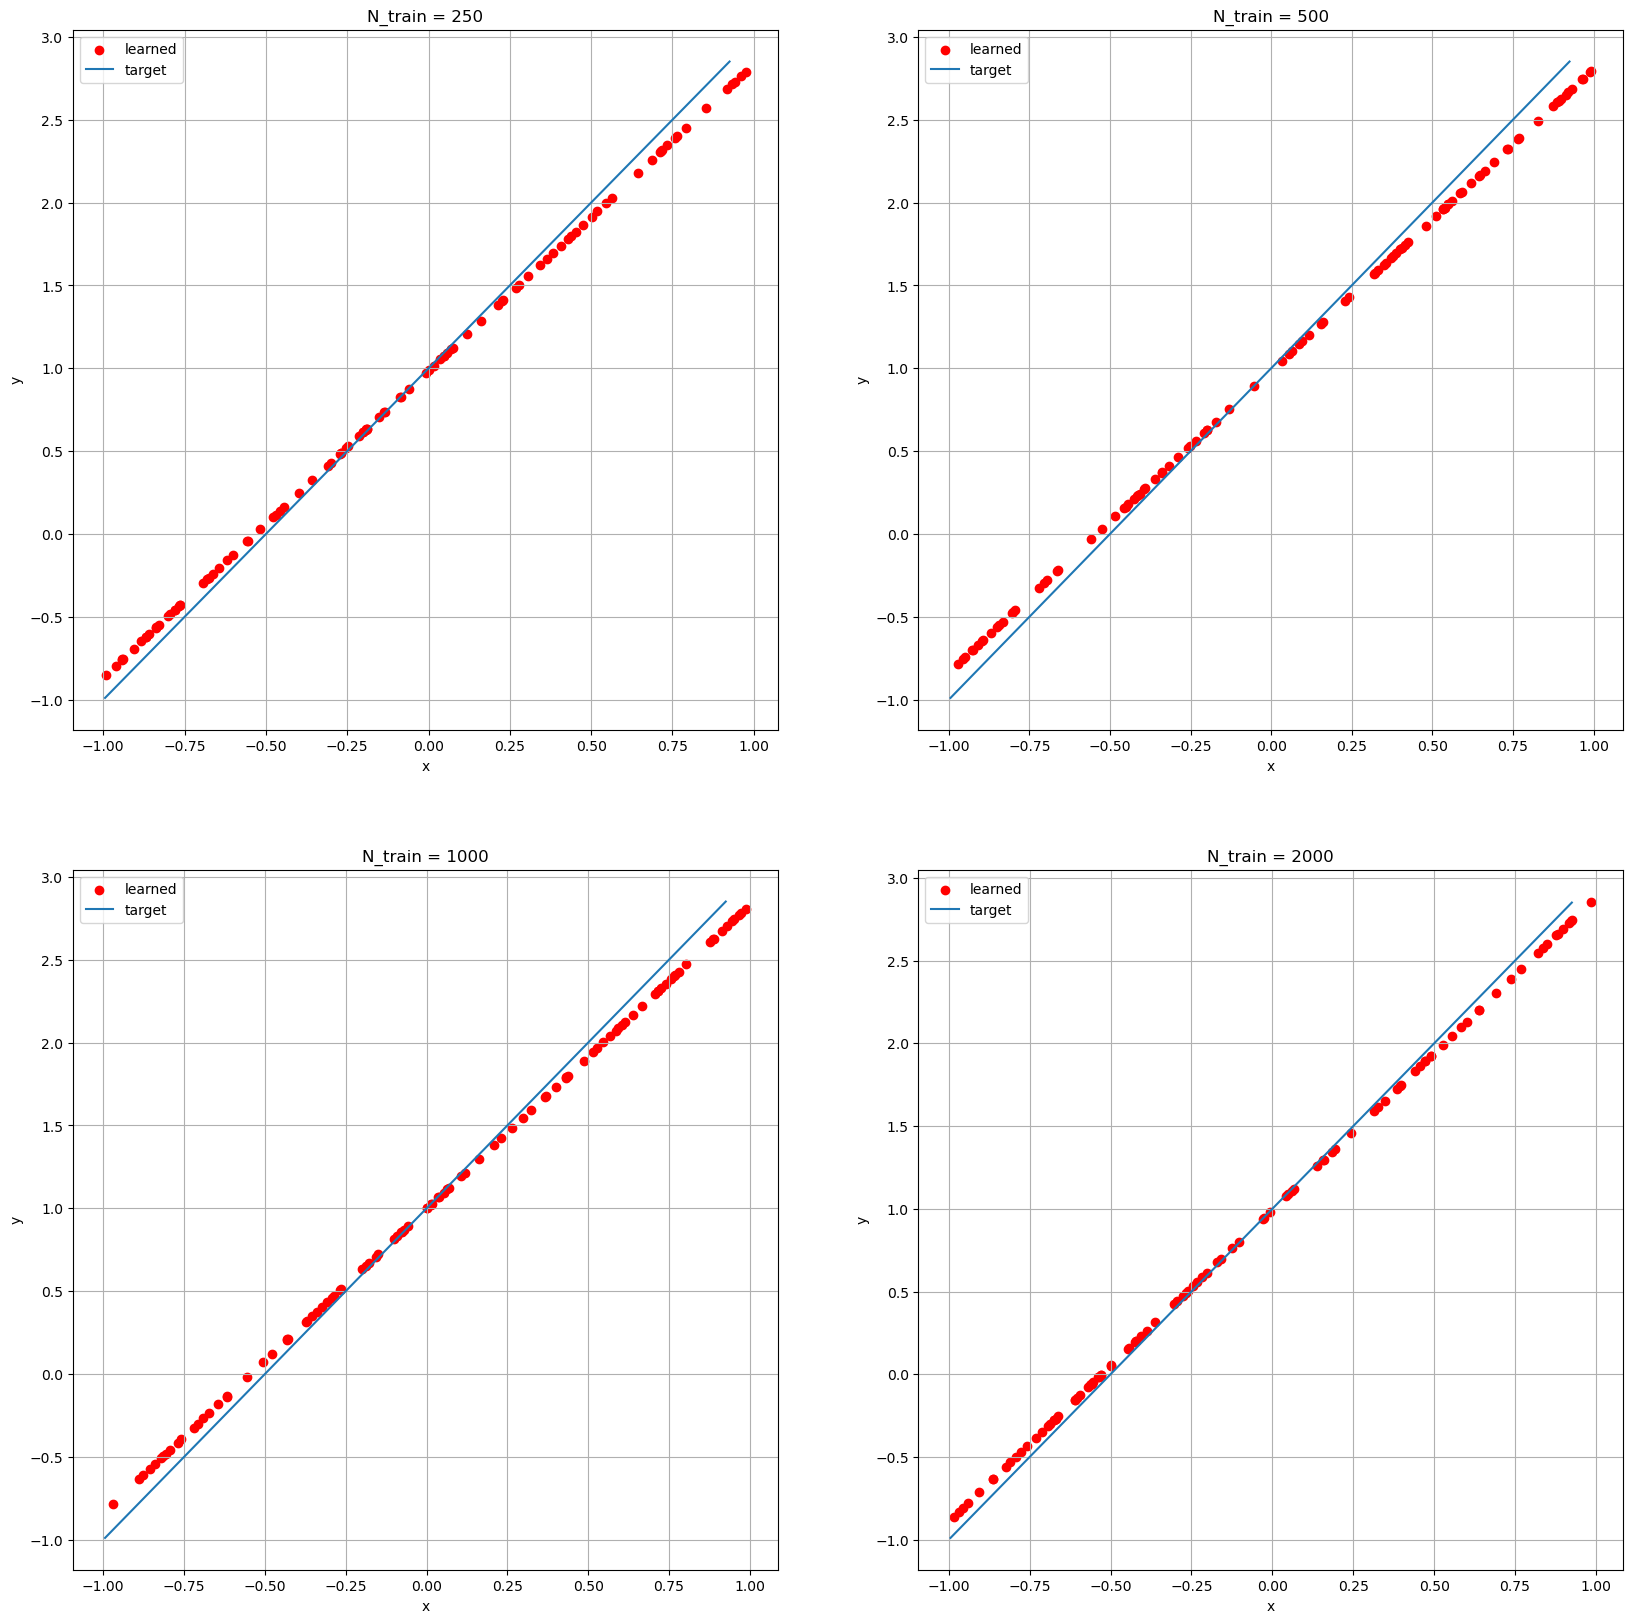

In [16]:
N_train = [250,500,1000,2000]

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

for i,N in enumerate(N_train):
    x_predicted, y_predicted = np.loadtxt(f'DATA/linear/N_train/N_train_{N}.dat', delimiter=' ', unpack=True)
    axs[int(i/2)][i%2].scatter(x_predicted, y_predicted,color='r', label='learned')
    axs[int(i/2)][i%2].plot(x_valid, y_target, label='target')
    axs[int(i/2)][i%2].set_xlabel('x')
    axs[int(i/2)][i%2].set_ylabel('y')
    axs[int(i/2)][i%2].legend()
    axs[int(i/2)][i%2].grid(True)
    axs[int(i/2)][i%2].set_title(f'N_train = {N}')

plt.show()

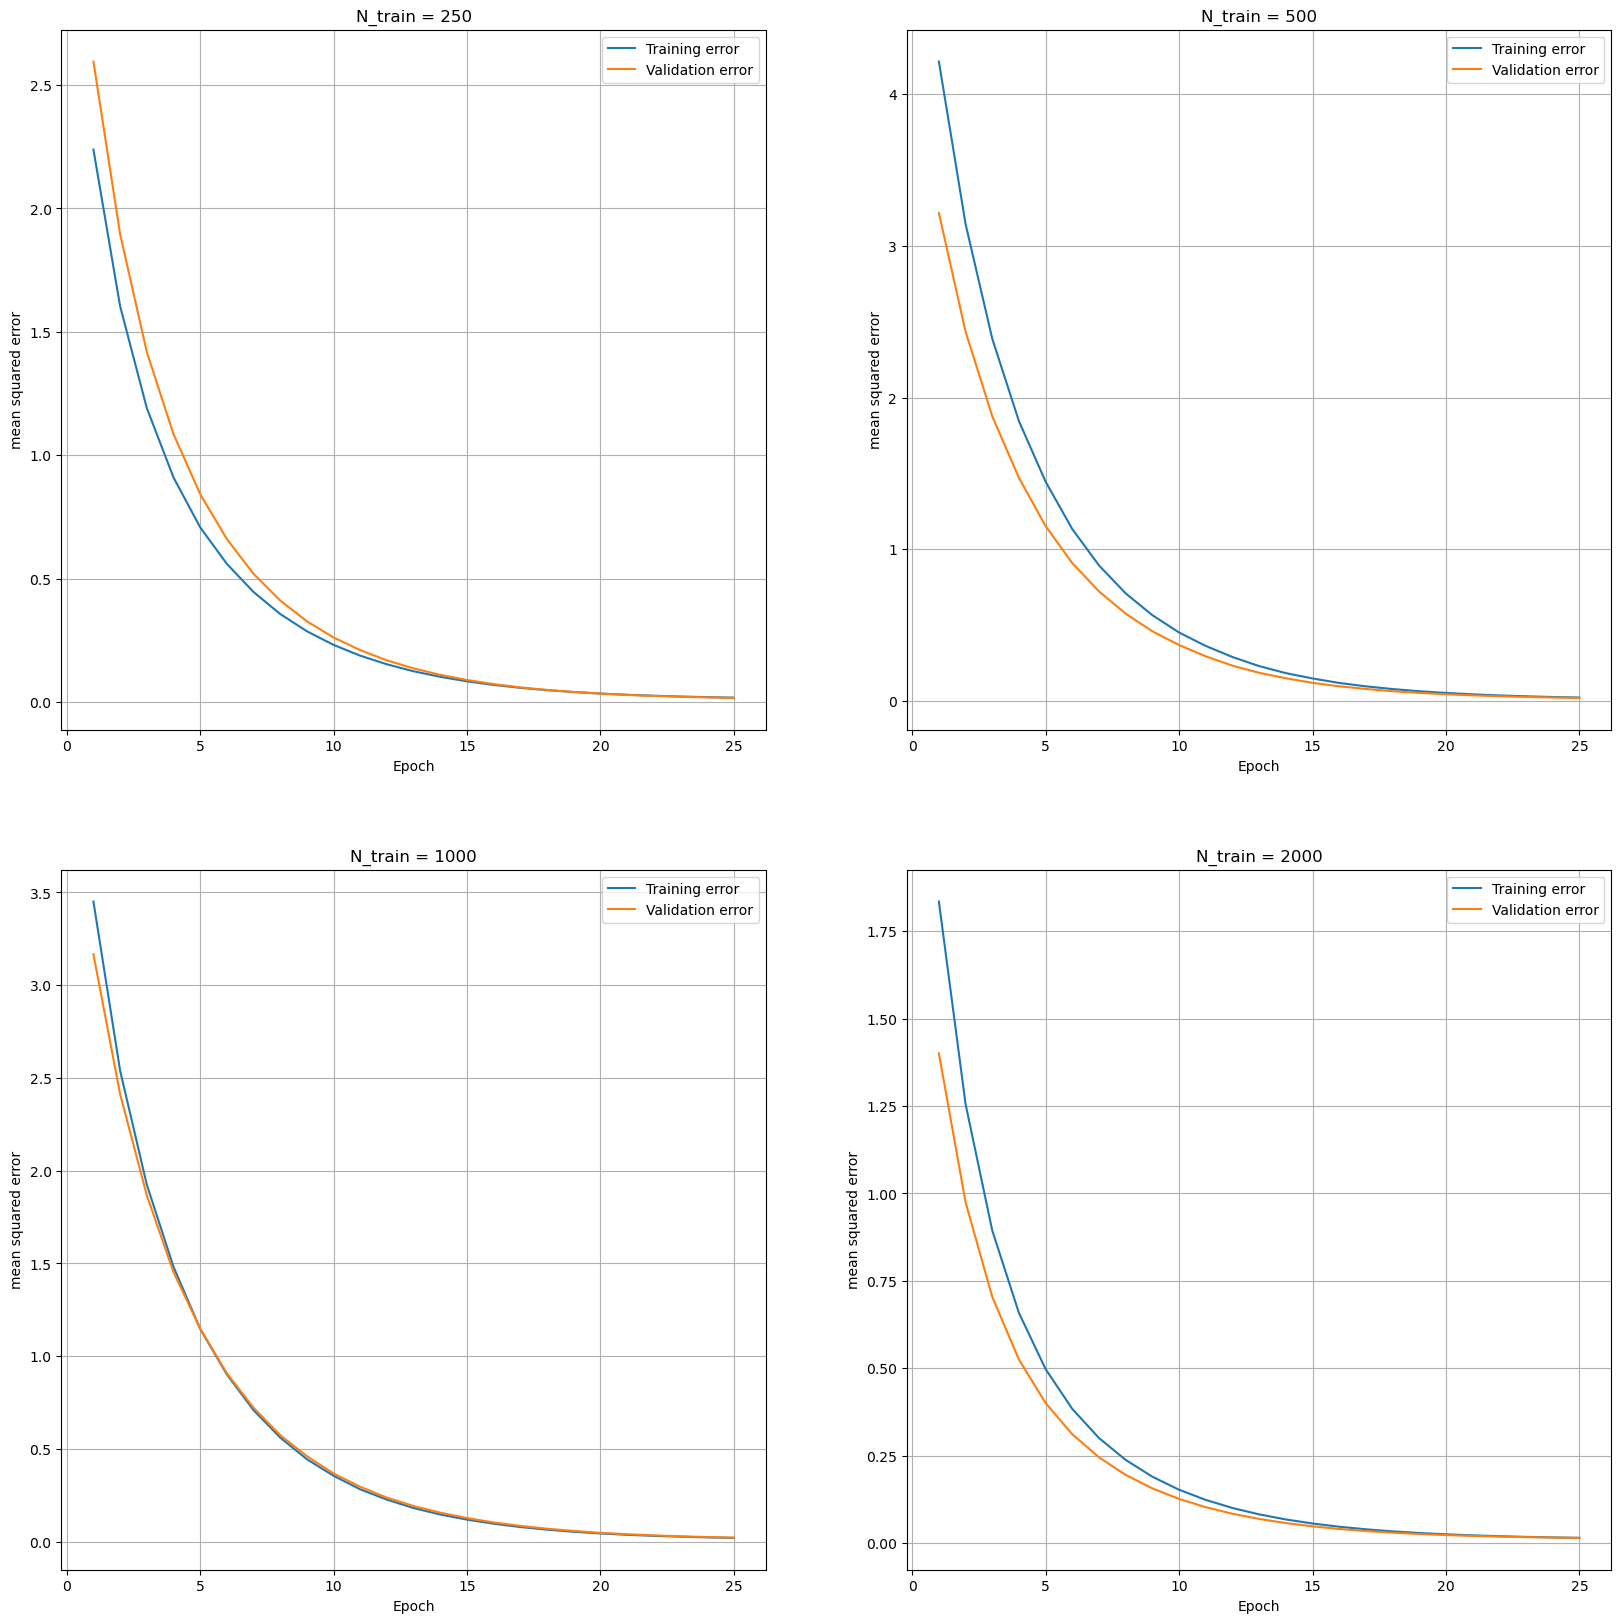

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

for i,N in enumerate(N_train):
    x,E_train, E_valid = np.loadtxt(f'DATA/linear/N_train/loss{N}.dat',usecols=(0,1,2),delimiter=' ', unpack=True)
    axs[int(i/2)][i%2].plot(x,E_train, label='Training error')
    axs[int(i/2)][i%2].plot(x,E_valid, label='Validation error')
    axs[int(i/2)][i%2].set_xlabel('Epoch')
    axs[int(i/2)][i%2].set_ylabel('mean squared error')
    axs[int(i/2)][i%2].legend()
    axs[int(i/2)][i%2].grid(True)
    axs[int(i/2)][i%2].set_title(f'N_train = {N}')

plt.show()

For this super simple linear fit it doesn't seem to matter how many training data we input.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

#### Number of Neurons per layer

From the Universal approximation theorem we know that one hidden layer with arbitrary large number of neurons can approximate any lebesgue integrable function.

By fixing 
```python
N_epochs = 25 # number of epochs
sigma =0.1 # noise level
N_train = 2500 # number of training data
N_batch = 32 # batch size
activation_function = 'tanh' #because it gives a smooth curve, Relu gives pointy curves.
```

and changing the number of neurons in the single hidden layer i obtain the following result:

In [17]:
# Polynomial function
def polynomial(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

x_valid = np.linspace(-1.5,1.5,100)
y_target = polynomial(x_valid)

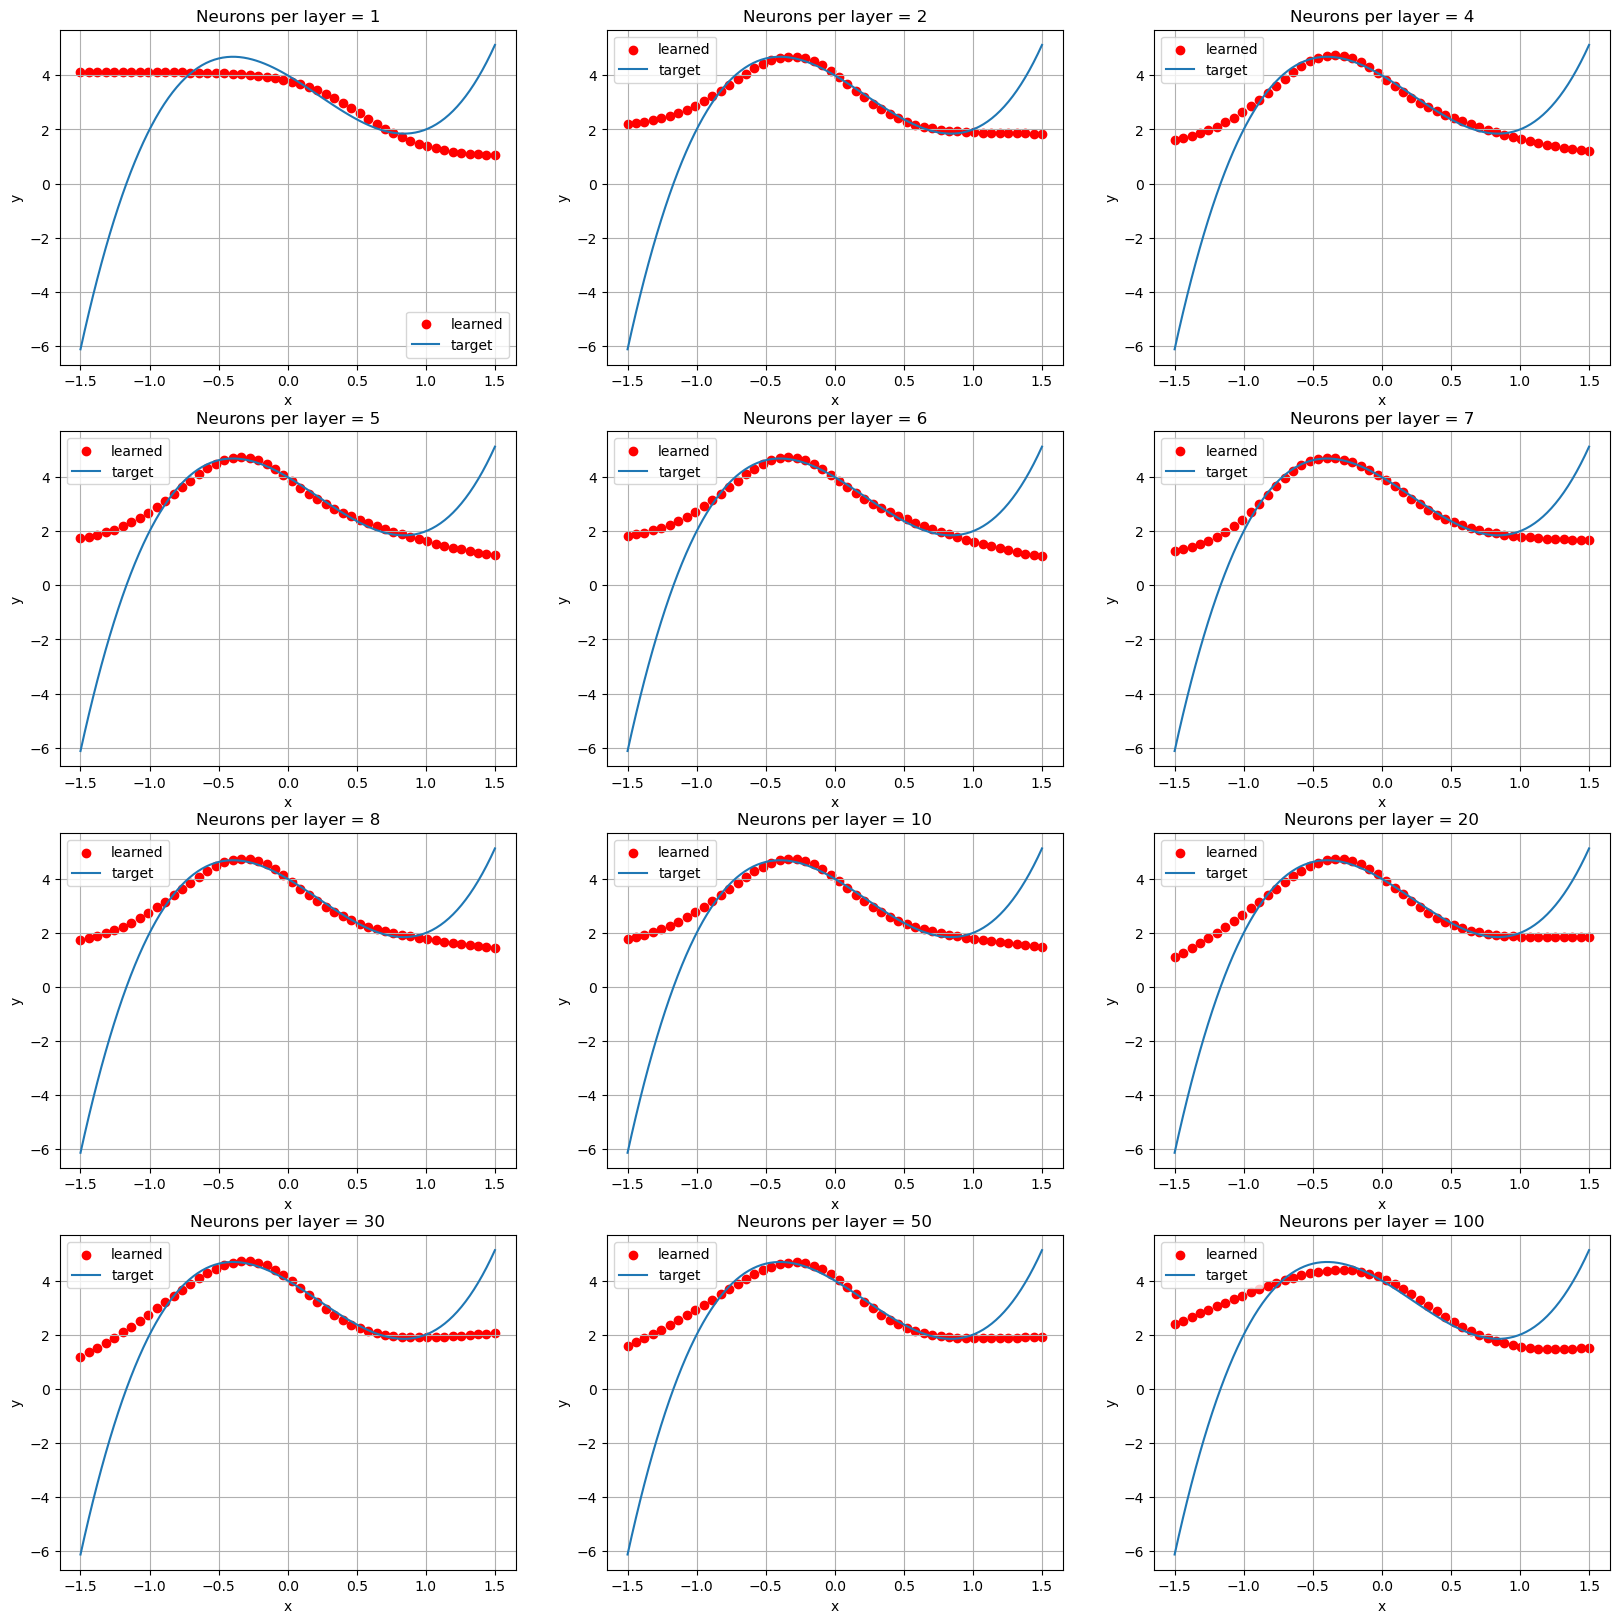

In [18]:
# plot data from DATA/polynomial/Neuron generated by polynomial.ipynb

neur_per_layer = [1,2,4,5,6,7,8,10,20,30,50,100]

fig, axs = plt.subplots(4, 3, figsize=(20, 20)) # (nrows, ncols)

for i,n in enumerate(neur_per_layer):
    x_predicted, y_predicted = np.loadtxt(f'DATA/polynomial/Neuron/neuron{n}.dat', delimiter=' ', unpack=True)
    axs[int(i/3)][i%3].scatter(x_predicted, y_predicted,color='r', label='learned')
    axs[int(i/3)][i%3].plot(x_valid, y_target, label='target')
    axs[int(i/3)][i%3].set_xlabel('x')
    axs[int(i/3)][i%3].set_ylabel('y')
    axs[int(i/3)][i%3].legend()
    axs[int(i/3)][i%3].grid(True)
    axs[int(i/3)][i%3].set_title(f'Neurons per layer = {n}')

plt.show()

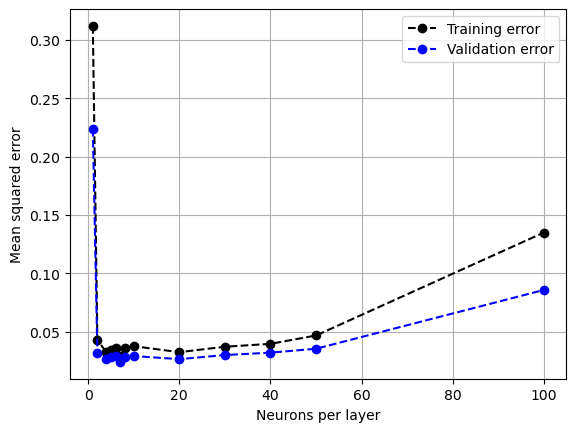

0.024081364274024963


In [19]:
E_train = []
E_valid = []

neur_per_layer = [1,2,4,5,6,7,8,10,20,30,40,50,100]
# neur_per_layer = [1,2,4,5,6,7,8]

for i,n in enumerate(neur_per_layer):
    x,loss_train, loss_valid = np.loadtxt(f'DATA/polynomial/Neuron/loss{n}.dat', delimiter=' ', unpack=True)
    E_train.append(loss_train[-1])
    E_valid.append(loss_valid[-1])

plt.plot(neur_per_layer,E_train, label='Training error', marker='o', linestyle='--', color='black')
plt.plot(neur_per_layer,E_valid, label='Validation error', marker='o', linestyle='--', color='blue')
plt.xlabel('Neurons per layer')
plt.ylabel('Mean squared error')
plt.legend()
plt.grid(True)
plt.show()

print(E_valid[5]) # this corresponds to 7 neurons per layer

By increasing the complexity (in this case the number of neuron in the hidden layer) of the model i see a diminiscing return. 4,5,6 and 7 gives roughly the same result.

#### Number of Layers

we can also try to add more hidden layers of the same height (i choose n=7 because it worked well in the previous case) and everything else is untouched.

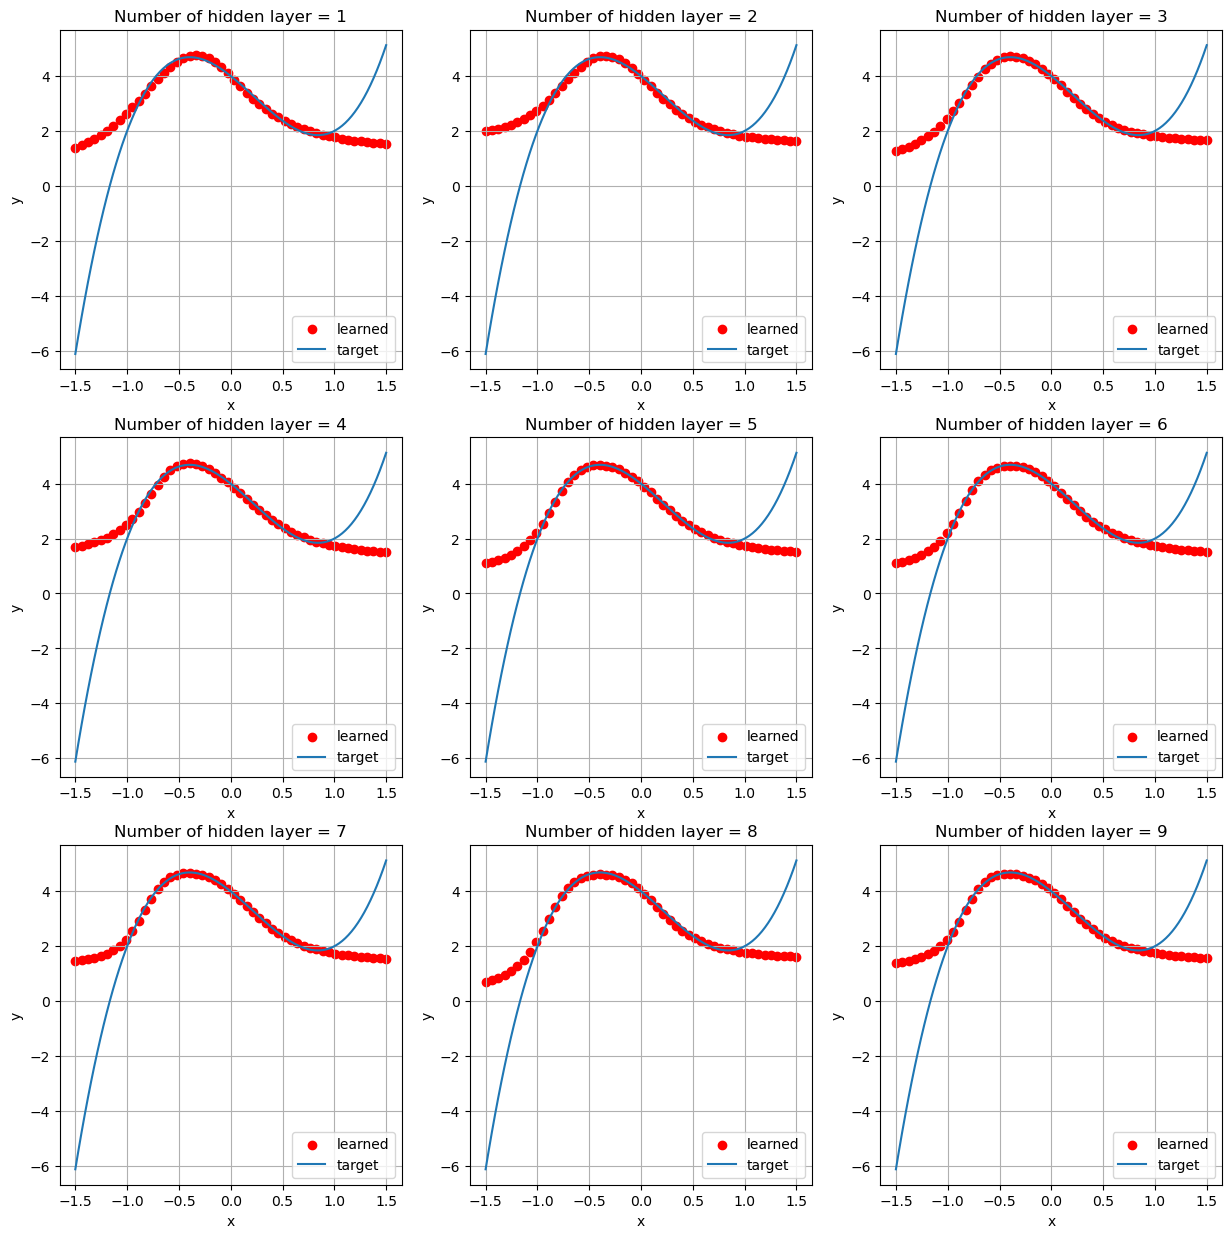

In [20]:
# plot data from DATA/polynomial/layer/ generated by polynomial.ipynb

layer = [1,2,3,4,5,6,7,8,9]

fig, axs = plt.subplots(3, 3, figsize=(15, 15)) # (nrows, ncols)

for i,n in enumerate(layer):
    x_predicted, y_predicted = np.loadtxt(f'DATA/polynomial/layers/layers{n}.dat', delimiter=' ', unpack=True)
    axs[int(i/3)][i%3].scatter(x_predicted, y_predicted,color='r', label='learned')
    axs[int(i/3)][i%3].plot(x_valid, y_target, label='target')
    axs[int(i/3)][i%3].set_xlabel('x')
    axs[int(i/3)][i%3].set_ylabel('y')
    axs[int(i/3)][i%3].legend()
    axs[int(i/3)][i%3].grid(True)
    axs[int(i/3)][i%3].set_title(f'Number of hidden layer = {n}')

plt.show()

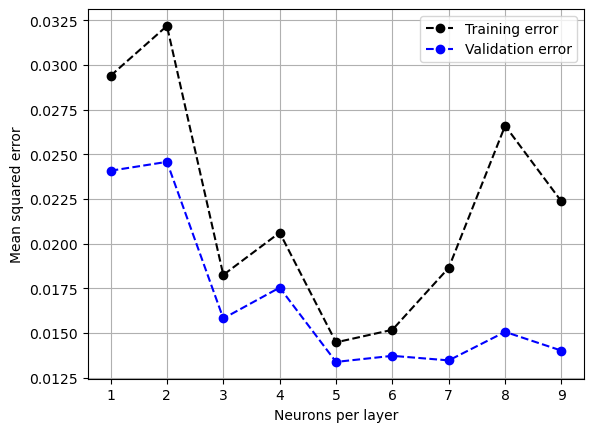

In [21]:
E_train = []
E_valid = []

layer = [1,2,3,4,5,6,7,8,9]

for i,n in enumerate(layer):
    x,loss_train, loss_valid = np.loadtxt(f'DATA/polynomial/layers/loss{n}.dat', delimiter=' ', unpack=True)
    E_train.append(loss_train[-1])
    E_valid.append(loss_valid[-1])

plt.plot(layer,E_train, label='Training error', marker='o', linestyle='--', color='black')
plt.plot(layer,E_valid, label='Validation error', marker='o', linestyle='--', color='blue')
plt.xlabel('Neurons per layer')
plt.ylabel('Mean squared error')
plt.legend()
plt.grid(True)
plt.show()

from a Mean Squared Error of 0.0248 on validation data previously obtained with 1 hidden layer(can also be seen here), we can lower it by adding more hidden layers and then this trend stops, increasing complexity makes the DNN learn the error present in the training data, the risk of overfitting is higher with more complex models.

#### Activation function, optimizers, error

- relu: $f(z) = 0 \text{ for } z<0, z \text{ for z>0 } $
- sigmoid: $\sigma(z)=\frac{1}{1+e^{-z}}$
- tanh: $\tanh(z)= \frac{e^z - e^{-z}}{e^z + e^{-z}}$

these two are related to each other by a linear transformation(translation and dilatation/contraction). In fact $\tanh(z) +1 = 2\cdot\sigma(2z)$
So with $z = w\cdot x + b$ they cover almost the same function space by varying $w$ and $b$ but can't obtain a translation.

To test the other components i left everything fixed like the previous test, this time with 5 hidden layer and 7 neurons per layer. I tried changing the activation function (all identical because it's easier otherwise there would be lots of combinations and i would never finish testing them all) the results were satisfactory with $\tanh$ and sigmoid as activation function, while Relu gave pointy edges for small models, but increasing the number of hidden layes solved this problem and gave results on par with $\tanh$ if not better. 

As for optimizers i chose SGD and Adam, with the latter performing i a little bit better. I used them out of the box with default settings, maybe with a better choice of those settings the result might turn out to be better. So i can't conclude who's better, both of them works fine.

For loss functions i tried Mean squared error and mean absolute error, but didn't notice a significant difference between the 2.


### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

In [22]:
#parameters
N_epochs = 10
N_train = 10000
N_valid = 1000
sigma = 0.1

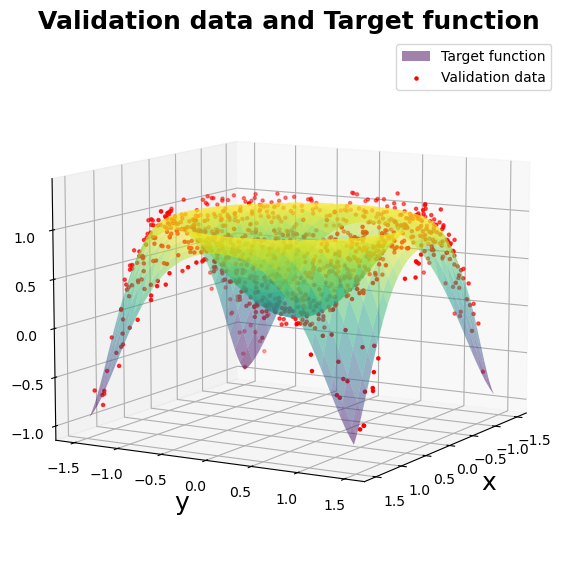

In [23]:
#Generate input data
lim = 3/2

x_train = np.random.uniform(-lim, lim, N_train)
y_train = np.random.uniform(-lim, lim, N_train)
x_valid = np.random.uniform(-lim, lim, N_valid)
y_valid = np.random.uniform(-lim, lim, N_valid)

# Target function
def f(x, y):
    return np.sin(x ** 2 + y ** 2)

# Generate noisy target and validation data
z_target = f(x_valid, y_valid)
z_train = np.random.normal(f(x_train, y_train), sigma)
z_valid = np.random.normal(f(x_valid, y_valid), sigma)

# Plot target function and validation data
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface of the target function
x_surf = np.arange(-lim, lim, 0.05)
y_surf = np.arange(-lim, lim, 0.05)
X_surf, Y_surf = np.meshgrid(x_surf, y_surf)
ax.plot_surface(X_surf, Y_surf, f(X_surf, Y_surf), cmap='viridis', alpha=0.5, label='Target function')

# Scatter plot of validation data
ax.scatter(x_valid, y_valid, z_valid, marker='.', color='r', label='Validation data')

# Set labels and legend
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_zlabel('z', fontsize=18)
ax.set_title('Validation data and Target function', fontsize=18, fontweight='bold')
ax.legend()
ax.view_init(10, 30)

plt.show()

In [24]:
# Define the model (suggested by ChatGPT)
model = Sequential([
    Dense(64, activation='relu',input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(1)  # No activation function for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                192       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4417 (17.25 KB)
Trainable params: 4417 (17.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Fit the model to the training data
history = model.fit(
    x=np.column_stack((x_train, y_train)), y=z_train,  # Convert x_train, y_train to 2D array
    batch_size=32, epochs=N_epochs,
    shuffle=True,
    validation_data=(np.column_stack((x_valid, y_valid)), z_valid)  # Convert x_valid, y_valid to 2D array
)

Epoch 1/10


313/313 [==============================] - 1s 1ms/step - loss: 0.1601 - val_loss: 0.1032
Epoch 2/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0769 - val_loss: 0.0391
Epoch 3/10
313/313 [==============================] - 0s 989us/step - loss: 0.0281 - val_loss: 0.0159
Epoch 4/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0129
Epoch 5/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0121
Epoch 6/10
313/313 [==============================] - 0s 984us/step - loss: 0.0124 - val_loss: 0.0125
Epoch 7/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0122
Epoch 8/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0114 - val_loss: 0.0118
Epoch 9/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0115 - val_loss: 0.0134
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0114 - val_loss: 0.0114


TEST DATA evaluation
Test loss: 0.011440551839768887

EXACT CURVE evaluation
Test loss:      0.0012961268657818437
Test accuracy:  0.0012961268657818437


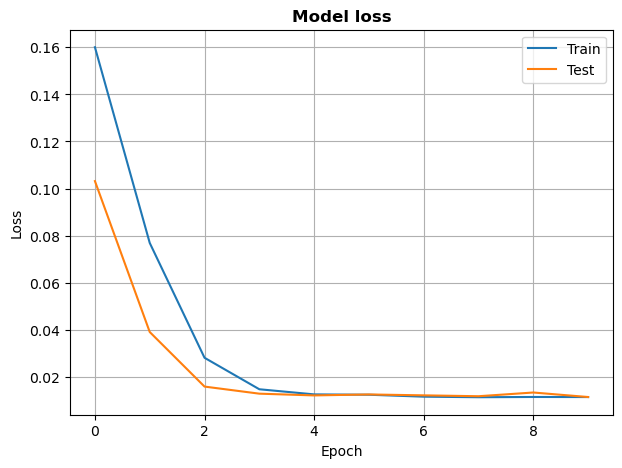

63/63 [==============================] - 0s 705us/step


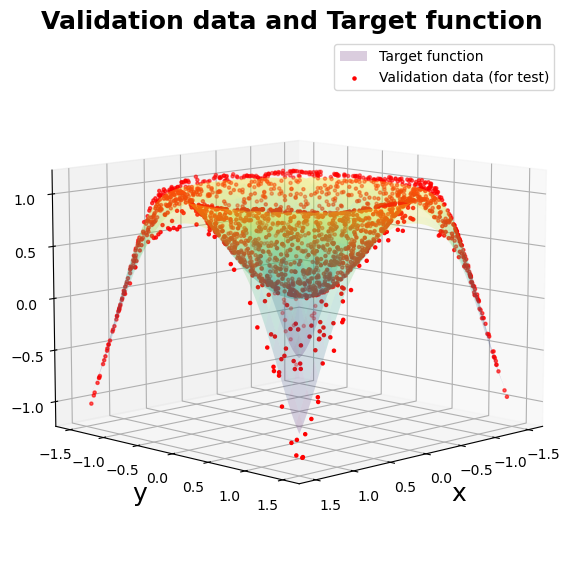

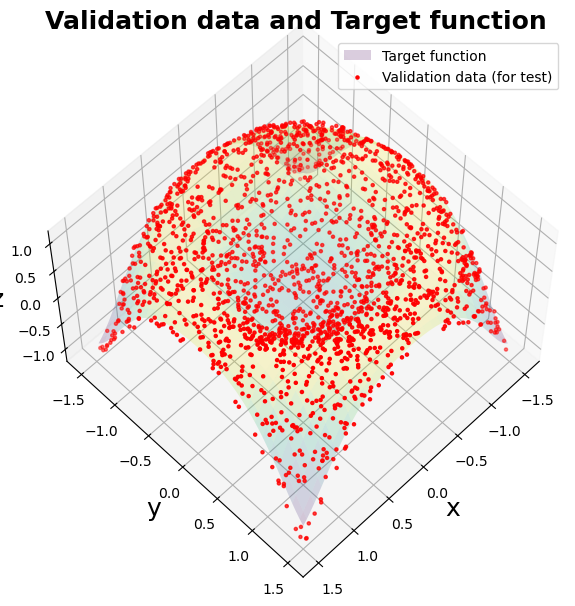

In [26]:
# Evaluate with test data
print("TEST DATA evaluation")
score = model.evaluate(np.column_stack((x_valid, y_valid)), z_valid, batch_size=32, verbose=0)
print('Test loss:', score)
print()

# Evaluate with the exact curve
print("EXACT CURVE evaluation")
score = model.evaluate(np.column_stack((x_valid, y_valid)), z_target, batch_size=32, verbose=0)
print('Test loss:     ', score)
print('Test accuracy: ', score)

# Training history visualization
plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontweight="bold")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

# Compare model predictions with target function
x_predicted = np.random.uniform(-lim, lim, 2000)
y_predicted = np.random.uniform(-lim, lim, 2000)
XY_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model.predict(XY_predicted)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface of the target function
ax.plot_surface(X_surf, Y_surf, f(X_surf, Y_surf), cmap='viridis', alpha=0.2, label='Target function')

# Scatter plot of predicted data
ax.scatter(x_predicted, y_predicted, z_predicted, marker='.', color='r', label='Validation data (for test)')

# Set labels and legend
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_zlabel('z', fontsize=18)
ax.set_title('Validation data and Target function', fontsize=18, fontweight='bold')
ax.legend()
ax.view_init(10, 45)

plt.show()

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface of the target function
ax.plot_surface(X_surf, Y_surf, f(X_surf, Y_surf), cmap='viridis', alpha=0.2, label='Target function')

# Scatter plot of predicted data
ax.scatter(x_predicted, y_predicted, z_predicted, marker='.', color='r', label='Validation data (for test)')

# Set labels and legend
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_zlabel('z', fontsize=18)
ax.set_title('Validation data and Target function', fontsize=18, fontweight='bold')
ax.legend()
ax.view_init(60, 45)

plt.show()


63/63 [==============================] - 0s 579us/step


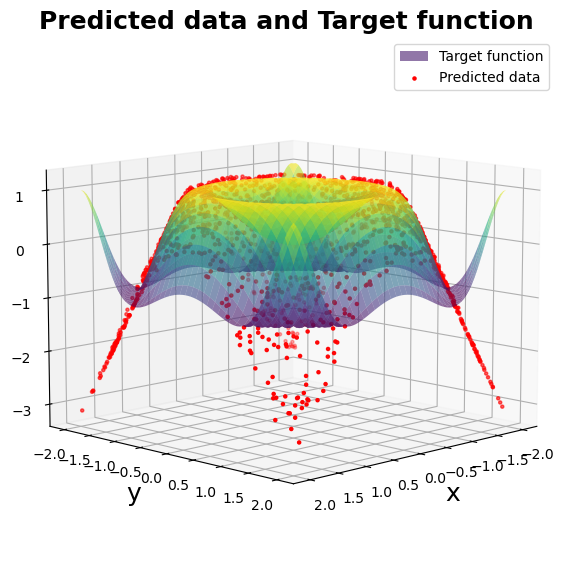

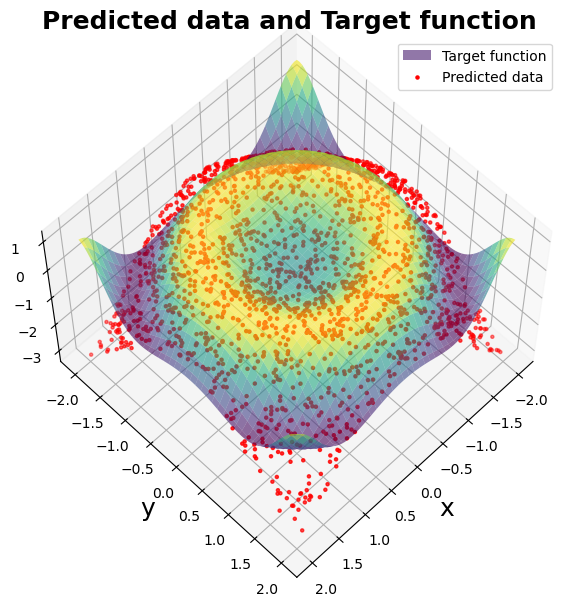

In [27]:
# prediction 
lim = 2
x_predicted = np.random.uniform(-lim, lim, 2000)
y_predicted = np.random.uniform(-lim, lim, 2000)
XY_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model.predict(XY_predicted)

X_surf = np.arange(-lim, lim, 0.05)
Y_surf = np.arange(-lim, lim, 0.05)
X_surf, Y_surf = np.meshgrid(X_surf, Y_surf)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface of the target function
ax.plot_surface(X_surf, Y_surf, f(X_surf, Y_surf), cmap='viridis', alpha=0.6, label='Target function')

# Scatter plot of predicted data
ax.scatter(x_predicted, y_predicted, z_predicted, marker='.', color='r', label='Predicted data')

# Set labels and legend
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_zlabel('z', fontsize=18)
ax.set_title('Predicted data and Target function', fontsize=18, fontweight='bold')
ax.legend()
ax.view_init(10, 45)

plt.show()

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface of the target function
ax.plot_surface(X_surf, Y_surf, f(X_surf, Y_surf), cmap='viridis', alpha=0.6, label='Target function')

# Scatter plot of predicted data
ax.scatter(x_predicted, y_predicted, z_predicted, marker='.', color='r', label='Predicted data')

# Set labels and legend
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.set_zlabel('z', fontsize=18)
ax.set_title('Predicted data and Target function', fontsize=18, fontweight='bold')
ax.legend()
ax.view_init(60, 45)

plt.show()